In [ ]:
#@title Mount
from google.colab import drive
drive.mount('/content/drive')

In [194]:
#@title Import Libraries
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#@title Extracting Dataset
heart = pd.read_csv("/content/drive/MyDrive/CSE422 Project/heart_disease.csv")
heart.head(10)


In [ ]:
#@title Dataset learning
print("Shape of dataset:",heart.shape)
print("Columns:",heart.columns)
print("Number of features:",heart.shape[1])
print("Number of data points:",heart.shape[0])
# print(heart.describe().round())
print("Target distribution: ")
print(heart['num'].value_counts())
# multi class classification problem

# Figures

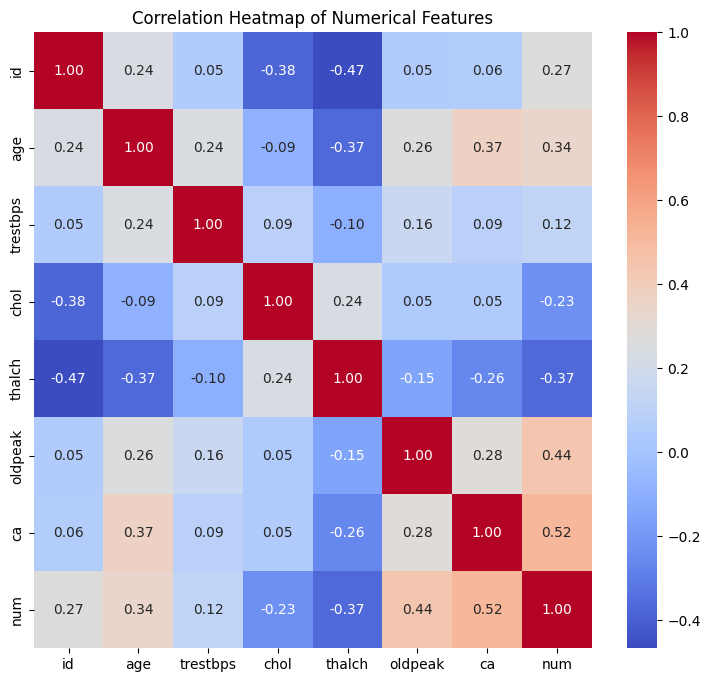

In [197]:

import matplotlib.pyplot as plt
import seaborn as sns

corr = heart.corr(numeric_only=True)
plt.figure(figsize=(9,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

/tmp/ipython-input-1831056943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="num", data=heart, palette="Set2")


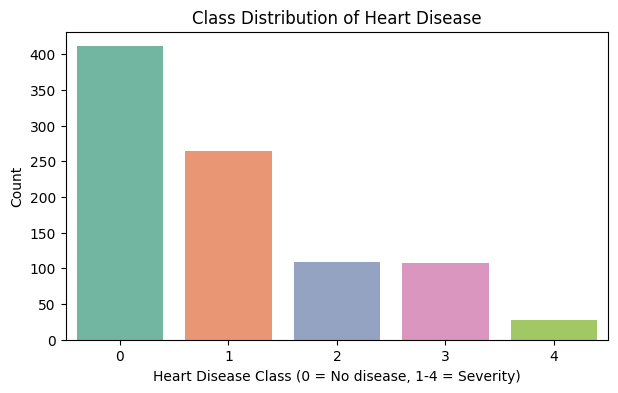

In [198]:
plt.figure(figsize=(7,4))
sns.countplot(x="num", data=heart, palette="Set2")
plt.title("Class Distribution of Heart Disease")
plt.xlabel("Heart Disease Class (0 = No disease, 1-4 = Severity)")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-2183365454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="num", y="age", data=heart, palette="Set3")


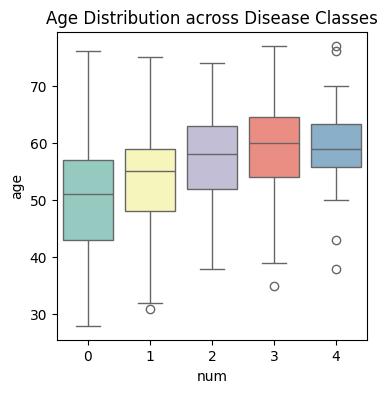

/tmp/ipython-input-2183365454.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="num", y="chol", data=heart, palette="Set1")


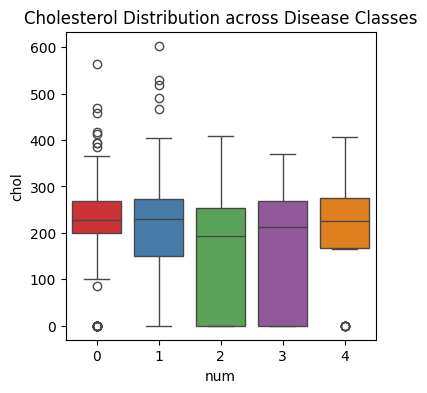

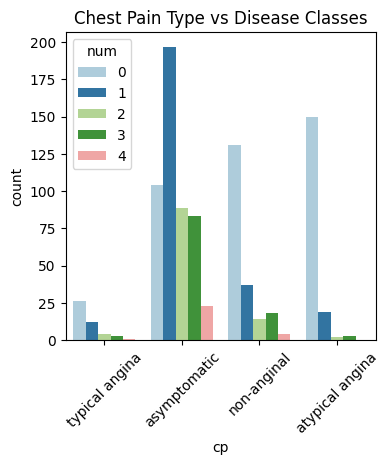

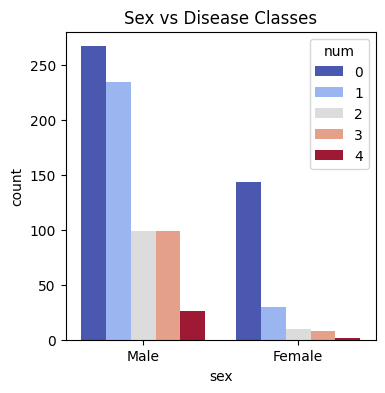

In [199]:
plt.figure(figsize=(4,4))
sns.boxplot(x="num", y="age", data=heart, palette="Set3")
plt.title("Age Distribution across Disease Classes")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(x="num", y="chol", data=heart, palette="Set1")
plt.title("Cholesterol Distribution across Disease Classes")
plt.show()

plt.figure(figsize=(4,4))
sns.countplot(x="cp", hue="num", data=heart, palette="Paired")
plt.title("Chest Pain Type vs Disease Classes")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(4,4))
sns.countplot(x="sex", hue="num", data=heart, palette="coolwarm")
plt.title("Sex vs Disease Classes")
plt.show()


Target distribution:
 num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


/tmp/ipython-input-3698051566.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="num", data=heart, palette="Set2")


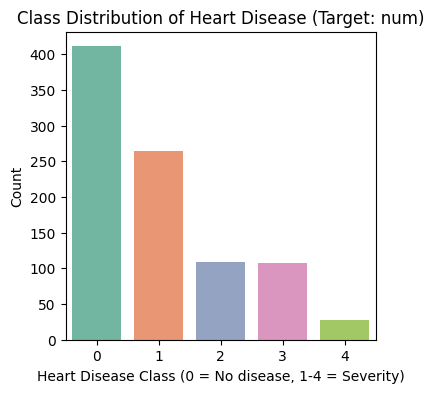

In [200]:
# target distribution
class_counts =heart['num'].value_counts()
print("\nTarget distribution:\n", class_counts)


plt.figure(figsize=(4,4))
sns.countplot(x="num", data=heart, palette="Set2")
plt.title("Class Distribution of Heart Disease (Target: num)")
plt.xlabel("Heart Disease Class (0 = No disease, 1-4 = Severity)")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-848341860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="num", y="age", data=heart, palette="Set3")


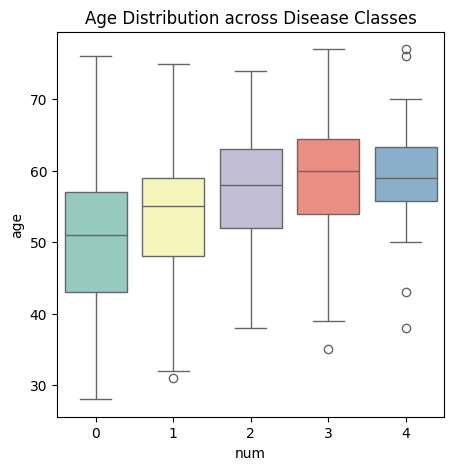

/tmp/ipython-input-848341860.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="num", y="chol", data=heart, palette="Set1")


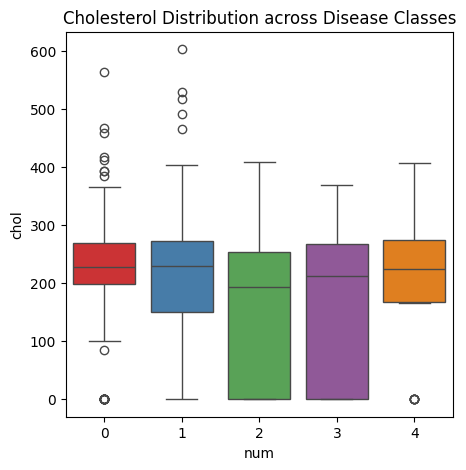

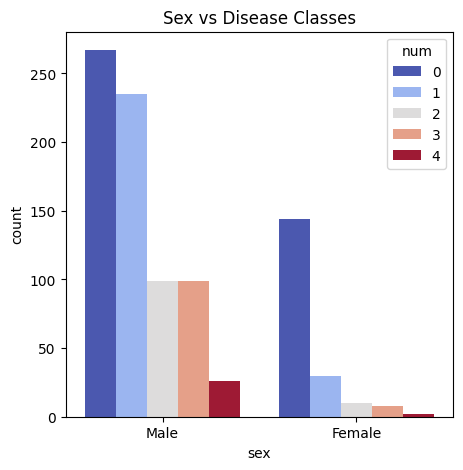

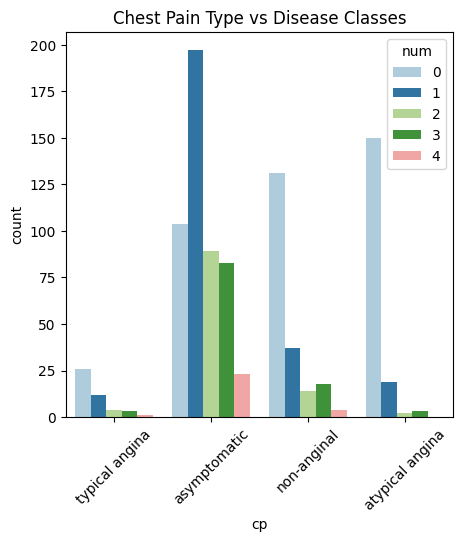

In [201]:
plt.figure(figsize=(5,5))
sns.boxplot(x="num", y="age", data=heart, palette="Set3")
plt.title("Age Distribution across Disease Classes")
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(x="num", y="chol", data=heart, palette="Set1")
plt.title("Cholesterol Distribution across Disease Classes")
plt.show()

plt.figure(figsize=(5,5))
sns.countplot(x="sex", hue="num", data=heart, palette="coolwarm")
plt.title("Sex vs Disease Classes")
plt.show()

plt.figure(figsize=(5,5))
sns.countplot(x="cp", hue="num", data=heart, palette="Paired")
plt.title("Chest Pain Type vs Disease Classes")
plt.xticks(rotation=45)
plt.show()


#  Dataset pre-processing

In [202]:
#@title Count null
print("Feature -   Null")
print(heart.isnull().sum())

Feature -   Null
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [203]:
#@title Handling null values- Imputing
heart = heart.drop(columns=["id","dataset", "ca"],axis=1)
heart = heart.dropna(axis=0, subset = ["restecg"])


#imputing  values
#using mean
impute_chol = SimpleImputer(missing_values=np.nan, strategy='mean')
impute_chol.fit(heart[['chol']])
heart['chol'] = impute_chol.transform(heart[['chol']])

impute_trestbps = SimpleImputer(missing_values=np.nan, strategy='mean')
impute_trestbps.fit(heart[['trestbps']])
heart['trestbps'] = impute_trestbps.transform(heart[['trestbps']])

impute_oldpeak = SimpleImputer(missing_values=np.nan, strategy='mean')
impute_oldpeak.fit(heart[['oldpeak']])
heart['oldpeak'] = impute_oldpeak.transform(heart[['oldpeak']])

impute_thalch = SimpleImputer(missing_values=np.nan, strategy='mean')
impute_thalch.fit(heart[['thalch']])
heart['thalch'] = impute_thalch.transform(heart[['thalch']])


heart["fbs"] = heart["fbs"].fillna(heart["fbs"].mode()[0]).infer_objects(copy=False)
heart["exang"] = heart["exang"].fillna(heart["exang"].mode()[0]).infer_objects(copy=False)
heart["slope"] = heart["slope"].fillna(heart["slope"].mode()[0]).infer_objects(copy=False)
heart["thal"] = heart["thal"].fillna(heart["thal"].mode()[0]).infer_objects(copy=False)

/tmp/ipython-input-3954643077.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart["fbs"] = heart["fbs"].fillna(heart["fbs"].mode()[0]).infer_objects(copy=False)
/tmp/ipython-input-3954643077.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart["exang"] = heart["exang"].fillna(heart["exang"].mode()[0]).infer_objects(copy=False)


In [ ]:
#@title Encoding
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

heart['sex'] = heart['sex'].replace({'male':1, 'female':0, 'M':1, 'F':0, 'Male':1, 'Female':0})
heart['fbs'] = heart['fbs'].replace({True:1, False:0, 't':1, 'f':0, 'T':1, 'F':0})
heart['exang'] = heart['exang'].replace({True:1, False:0, 'yes':1, 'no':0, 'Y':1, 'N':0})


# one hot encoding
# print(heart['cp'].unique())
# print(heart['restecg'].unique())
# print(heart['slope'].unique())


heart = pd.get_dummies(heart, columns=['cp', 'restecg','slope','thal'])

print(heart.columns.tolist())
heart['cp_atypical angina'] = enc.fit_transform(heart['cp_atypical angina'])
heart['cp_non-anginal'] = enc.fit_transform(heart['cp_non-anginal'])
heart['cp_typical angina'] = enc.fit_transform(heart['cp_typical angina'])
heart['cp_asymptomatic'] = enc.fit_transform(heart['cp_asymptomatic'])
heart['restecg_lv hypertrophy'] = enc.fit_transform(heart['restecg_lv hypertrophy'])
heart['restecg_st-t abnormality'] = enc.fit_transform(heart['restecg_st-t abnormality'])
heart['restecg_normal'] = enc.fit_transform(heart['restecg_normal'])
heart['slope_flat'] = enc.fit_transform(heart['slope_flat'])
heart['slope_upsloping'] = enc.fit_transform(heart['slope_upsloping'])
heart['slope_downsloping'] = enc.fit_transform(heart['slope_downsloping'])
heart['thal_normal'] = enc.fit_transform(heart['thal_normal'])
heart['thal_reversable defect'] = enc.fit_transform(heart['thal_reversable defect'])
heart['thal_fixed defect'] = enc.fit_transform(heart['thal_fixed defect'])

In [ ]:
#@title Correlation
corr = heart.corr(numeric_only=True)
plt.figure(figsize=(13,9))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
#@title Recheck and drop
heart = heart.drop(columns=['thal_normal','slope_flat'],axis=1)
corr = heart.corr(numeric_only=True)
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [209]:
# @title Scaling


numeric_cols = ['age', 'chol','trestbps','thalch','oldpeak']
scaler = StandardScaler()
heart[numeric_cols] = scaler.fit_transform(heart[numeric_cols])


#  Dataset splitting

In [215]:
from sklearn.model_selection import train_test_split

x = heart.drop('num', axis=1)
y = heart['num']

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size= 0.2, random_state=42, stratify=y )

#  Model training and testing

# K-Nearest Neighbour

Accuracy: 0.6032608695652174
Precision: 0.5643691292206144
Recall: 0.3846761613903814
F1 Score: 0.3972026273907515


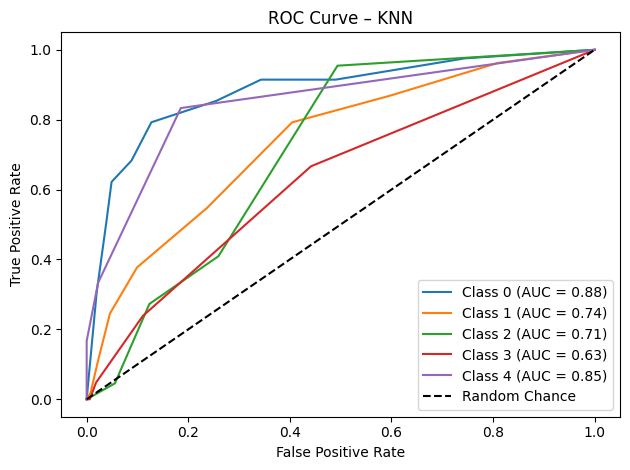

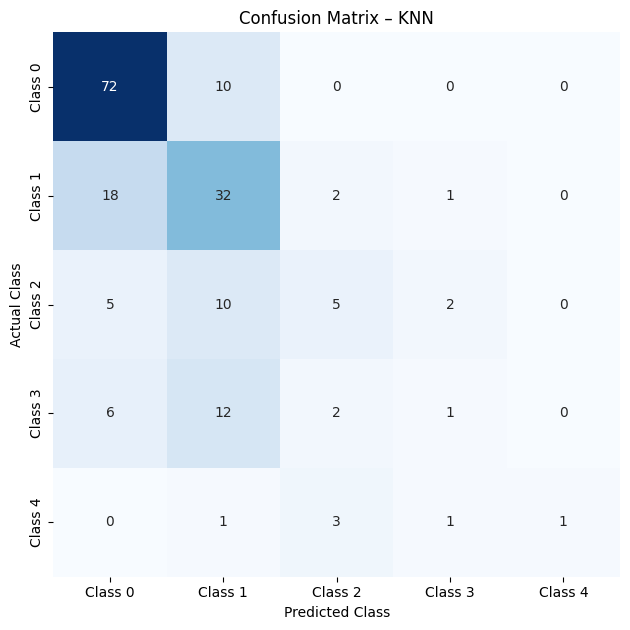

In [225]:
#KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

# Evaluation Metrics
print("Accuracy:",   accuracy_score(y_test, y_pred_knn))
print("Precision:",  precision_score(y_test, y_pred_knn, average="macro", zero_division=0))
print("Recall:",     recall_score(y_test, y_pred_knn, average="macro", zero_division=0))
print("F1 Score:",   f1_score(y_test, y_pred_knn, average="macro", zero_division=0))

# ROC Curve (for each class)
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_prob_knn.shape[1]

plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_knn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – KNN")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Confusion Matrix
conf_mtx = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6.4, 6.4))
sns.heatmap(
    conf_mtx,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[f"Class {i}" for i in range(n_classes)],
    yticklabels=[f"Class {i}" for i in range(n_classes)],
    cbar=False
)
plt.title("Confusion Matrix – KNN")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.tight_layout()
plt.show()

# Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5815217391304348
Precision: 0.5470306513409962
Recall: 0.3677994194791249
F1 Score: 0.38136398985629755
ROC-AUC: 0.7985169058351536


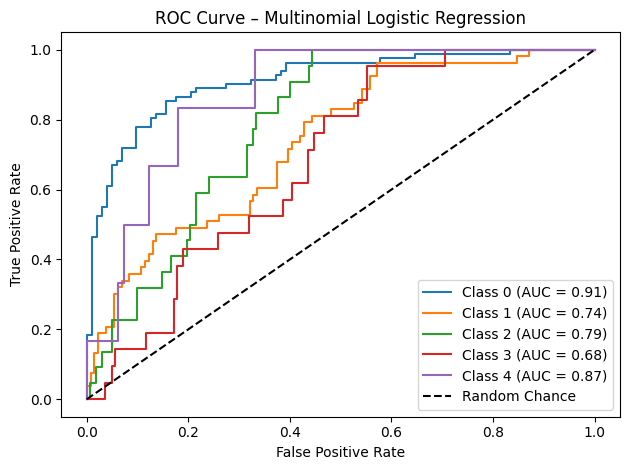

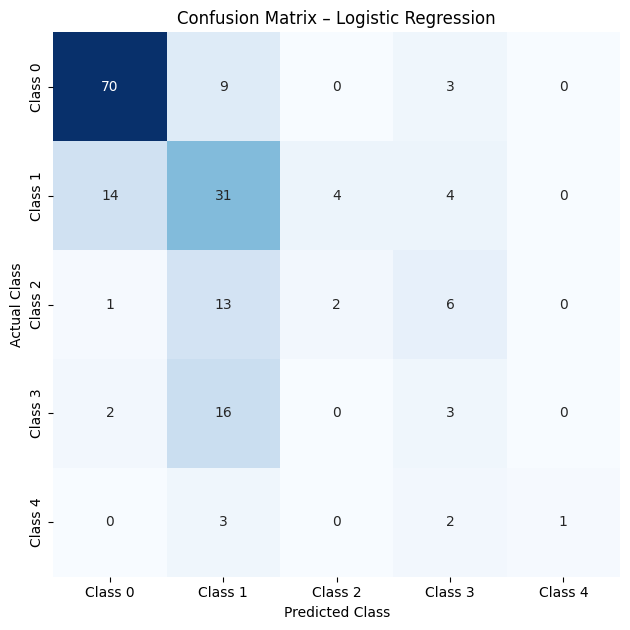

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Scaling features ----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- Train Multinomial Logistic Regression ----------------
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# ---------------- Predictions ----------------
y_pred_lr = lr_model.predict(X_test_scaled)         # Predicted classes
y_prob_lr = lr_model.predict_proba(X_test_scaled)   # Predicted probabilities

# ---------------- Evaluation Metrics ----------------
print("Accuracy:",   accuracy_score(y_test, y_pred_lr))
print("Precision:",  precision_score(y_test, y_pred_lr, average="macro"))
print("Recall:",     recall_score(y_test, y_pred_lr, average="macro"))
print("F1 Score:",   f1_score(y_test, y_pred_lr, average="macro"))
print("ROC-AUC:",    roc_auc_score(y_test, y_prob_lr, multi_class="ovr"))

# ---------------- ROC Curve (for each class) ----------------
fpr = {}
tpr = {}
roc_auc = {}

n_classes = y_prob_lr.shape[1]  # number of classes

plt.figure()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Multinomial Logistic Regression")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# ---------------- Confusion Matrix ----------------
conf_mtx = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6.4, 6.4))
sns.heatmap(
    conf_mtx,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[f"Class {i}" for i in range(n_classes)],
    yticklabels=[f"Class {i}" for i in range(n_classes)],
    cbar=False
)
plt.title("Confusion Matrix – Logistic Regression")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.tight_layout()
plt.show()


# Naive Bayes

Accuracy: 0.29891304347826086
Precision: 0.19406596572086993
Recall: 0.3195121951219512
F1 Score: 0.1627034333603677
ROC-AUC: 0.7399590218907203


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


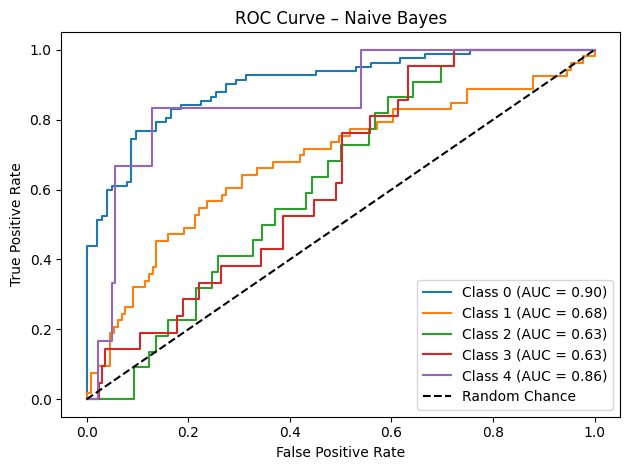

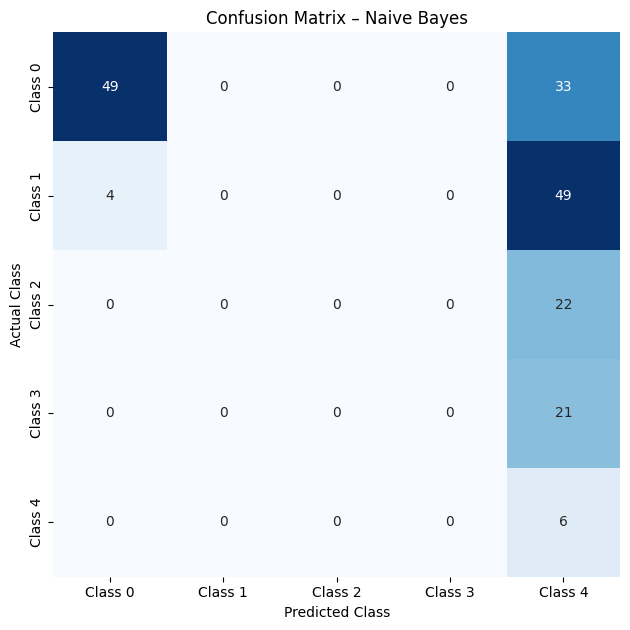

In [219]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Optional: Scaling ----------------
# Naive Bayes doesn’t always require scaling, but it’s okay to scale if features vary a lot
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- Train Naive Bayes ----------------
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# ---------------- Predictions ----------------
y_pred_nb = nb_model.predict(X_test_scaled)          # Predicted class labels
y_prob_nb = nb_model.predict_proba(X_test_scaled)    # Predicted probabilities

# ---------------- Evaluation Metrics ----------------
print("Accuracy:",   accuracy_score(y_test, y_pred_nb))
print("Precision:",  precision_score(y_test, y_pred_nb, average="macro"))
print("Recall:",     recall_score(y_test, y_pred_nb, average="macro"))
print("F1 Score:",   f1_score(y_test, y_pred_nb, average="macro"))
print("ROC-AUC:",    roc_auc_score(y_test, y_prob_nb, multi_class="ovr"))

# ---------------- ROC Curve (per class) ----------------
fpr = {}
tpr = {}
roc_auc = {}

n_classes = y_prob_nb.shape[1]

plt.figure()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob_nb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Naive Bayes")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# ---------------- Confusion Matrix ----------------
conf_mtx = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6.4, 6.4))
sns.heatmap(
    conf_mtx,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[f"Class {i}" for i in range(n_classes)],
    yticklabels=[f"Class {i}" for i in range(n_classes)],
    cbar=False
)
plt.title("Confusion Matrix – Naive Bayes")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.tight_layout()
plt.show()


# Neural Network

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1834 - loss: 1.6399
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4315 - loss: 1.4855 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5056 - loss: 1.3706  
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5299 - loss: 1.3166 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5634 - loss: 1.2698  
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6078 - loss: 1.1711 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6012 - loss: 1.1160  
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5788 - loss: 1.1886  
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5720 - loss: 1.1156 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6011 - loss: 1.1322  
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6326 - loss: 1.0141 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6127 -

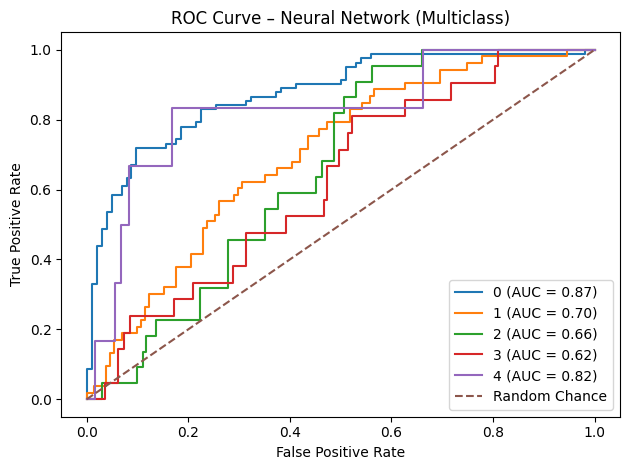

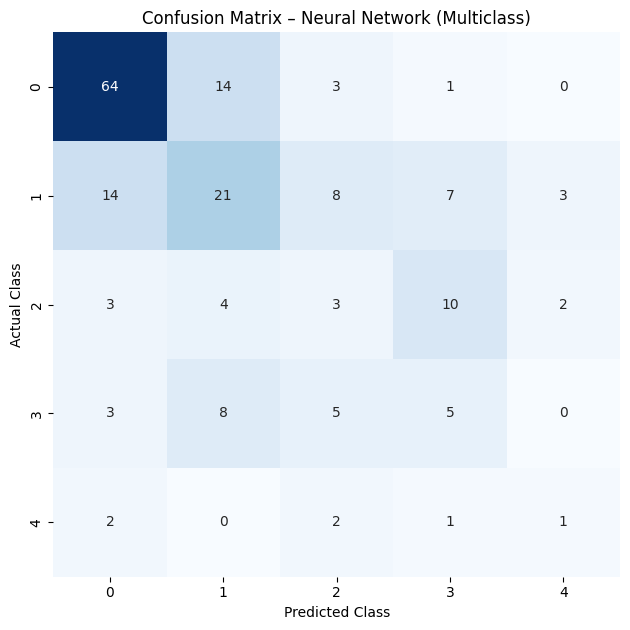

In [220]:
# ------------------- Imports -------------------
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, roc_auc_score, roc_curve, auc, confusion_matrix
)
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import numpy as np

# ------------------- Encode labels for multiclass -------------------
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)  # Shape: (num_samples, num_classes)

# ------------------- Compute class weights -------------------
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# ------------------- Define Neural Network -------------------
ann_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(y_train_bin.shape[1], activation='softmax')  # Softmax for multiclass
])

# Compile the model
ann_model.compile(optimizer=Adam(0.001),
                  loss='categorical_crossentropy',  # Categorical crossentropy
                  metrics=['accuracy'])

# ------------------- Train the model -------------------
history = ann_model.fit(
    X_train, y_train_bin,
    epochs=100,
    batch_size=128,
    class_weight=class_weights_dict,
    verbose=1
)

# ------------------- Evaluation -------------------
# Predictions
y_prob_ann = ann_model.predict(X_test)  # Probabilities (num_samples, num_classes)
y_pred_ann = np.argmax(y_prob_ann, axis=1)  # Predicted class indices
y_test_labels = np.argmax(y_test_bin, axis=1)  # True class indices

# Metrics
print("Accuracy:", accuracy_score(y_test_labels, y_pred_ann))
print("Precision:", precision_score(y_test_labels, y_pred_ann, average="macro", zero_division=0))
print("Recall:", recall_score(y_test_labels, y_pred_ann, average="macro", zero_division=0))
print("F1 Score:", f1_score(y_test_labels, y_pred_ann, average="macro", zero_division=0))
print("Matthews Corr Coef:", matthews_corrcoef(y_test_labels, y_pred_ann))
print("ROC-AUC:", roc_auc_score(y_test_bin, y_prob_ann, multi_class='ovr'))

# ------------------- ROC Curve for multiclass -------------------
plt.figure()
for i, class_name in enumerate(lb.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_ann[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1], linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Neural Network (Multiclass)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# ------------------- Confusion Matrix -------------------
conf_mtx = confusion_matrix(y_test_labels, y_pred_ann)
plt.figure(figsize=(6.4,6.4))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb.classes_, yticklabels=lb.classes_, cbar=False)
plt.title("Confusion Matrix – Neural Network (Multiclass)")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.tight_layout()
plt.show()


# Comparison


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


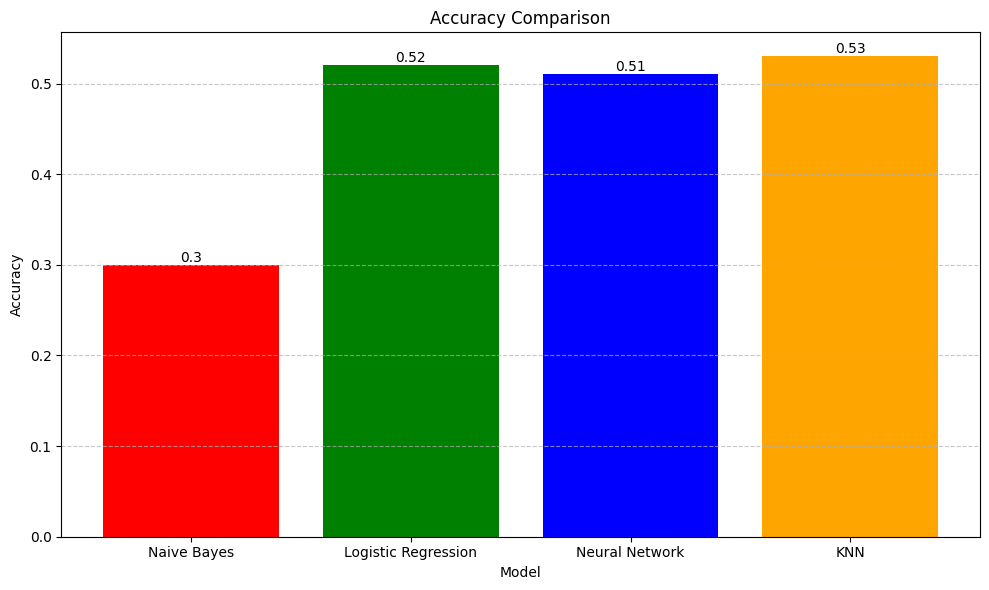

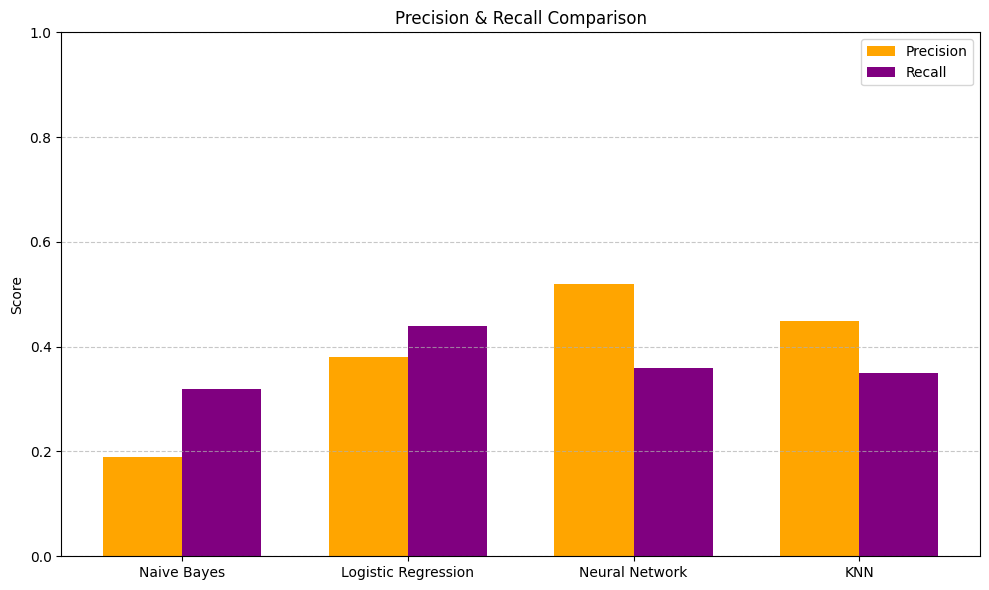

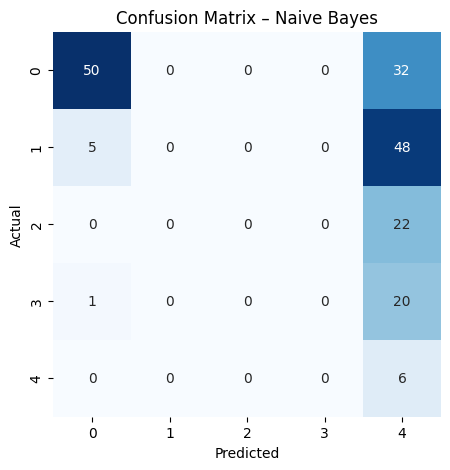

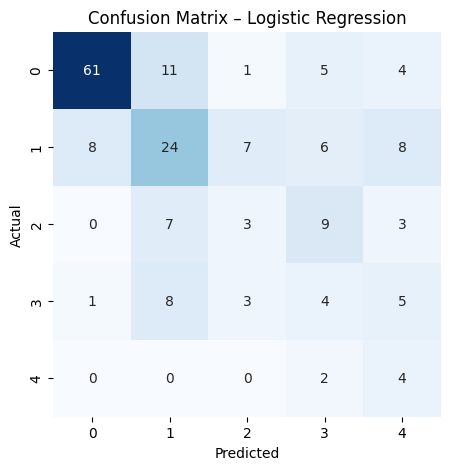

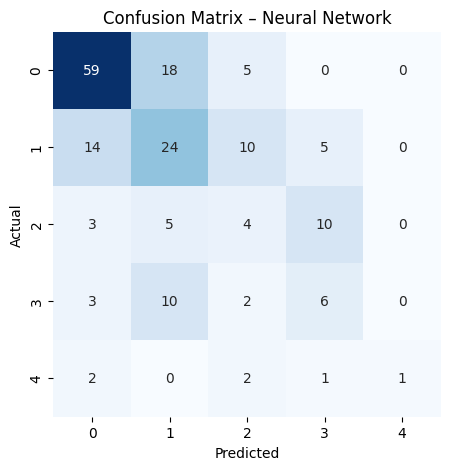

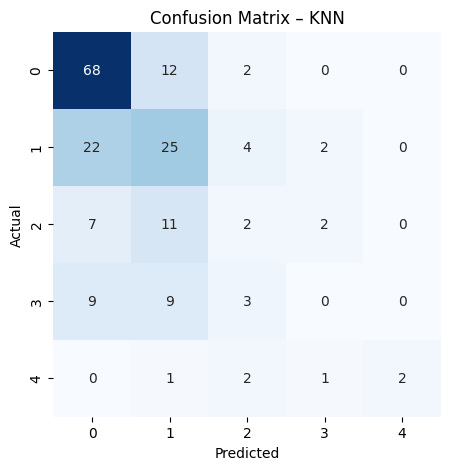

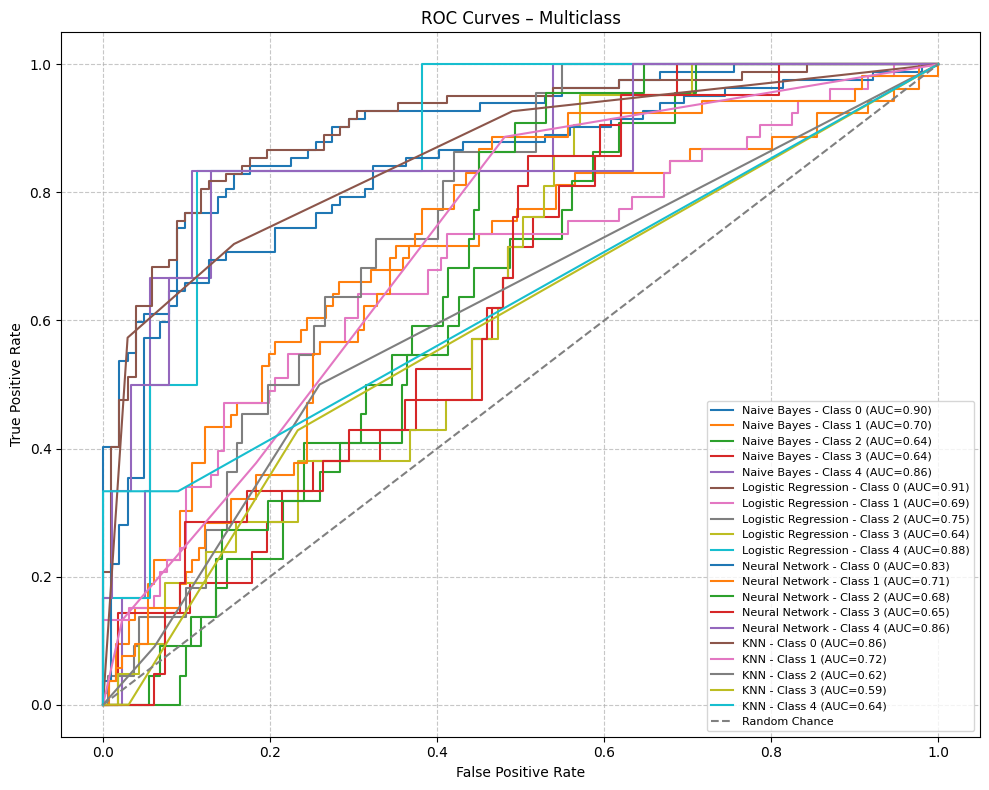

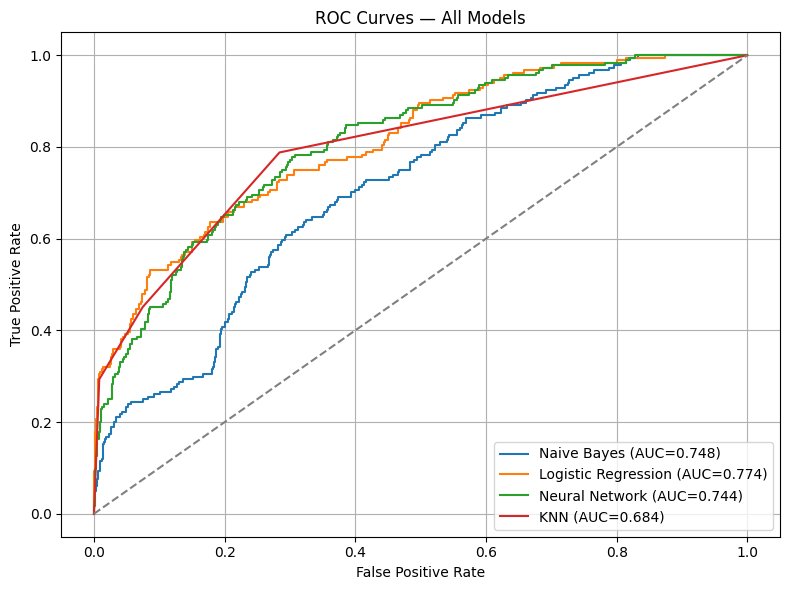

In [221]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ------------------- Train models -------------------
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3) # Add KNN model
}

y_preds = {}
y_probs = {}

# Binarize the output for multiclass ROC
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_preds[name] = model.predict(X_test)
    # Probabilities for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_probs[name] = model.predict_proba(X_test)
    else:
        # fallback: use decision_function for classifiers without predict_proba
        y_probs[name] = model.decision_function(X_test)

# ------------------- Accuracy Comparison -------------------
accuracy = [round(accuracy_score(y_test, y_preds[name]), 2) for name in models]
plt.figure(figsize=(10, 6)) # Increase figure size for more models
bars = plt.bar(models.keys(), accuracy, color=['red', 'green', 'blue', 'orange']) # Add color for KNN
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height}', ha='center', va='bottom')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ------------------- Precision & Recall -------------------
precision = [round(precision_score(y_test, y_preds[name], average='macro', zero_division=0), 2) for name in models]
recall = [round(recall_score(y_test, y_preds[name], average='macro', zero_division=0), 2) for name in models]

x = np.arange(len(models))
width = 0.35
plt.figure(figsize=(10, 6)) # Increase figure size for more models
plt.bar(x - width/2, precision, width, label='Precision', color='orange')
plt.bar(x + width/2, recall, width, label='Recall', color='purple')
plt.xticks(x, models.keys())
plt.title('Precision & Recall Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ------------------- Confusion Matrices -------------------
for name in models:
    cm = confusion_matrix(y_test, y_preds[name])
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix – {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ------------------- ROC Curve & AUC (One-vs-Rest) -------------------
plt.figure(figsize=(10, 8)) # Increase figure size for more models
for name in models:
    y_prob = y_probs[name]
    for i, cls in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} - Class {cls} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')
plt.title('ROC Curves – Multiclass')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=8)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

results = []
for name in models:
    y_prob = y_probs[name]
    if y_prob.shape[1] > 1:  # Multiclass
        auc_score = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
        # Use micro-average for plotting ROC
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    else:  # Binary
        fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
        auc_score = auc(fpr, tpr)
    results.append({"model": name, "fpr": fpr, "tpr": tpr, "auc": auc_score})

# Plot combined ROC curves
plt.figure(figsize=(8,6))
for r in results:
    plt.plot(r["fpr"], r["tpr"], label=f"{r['model']} (AUC={r['auc']:.3f})")
plt.plot([0,1],[0,1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# K-Mean

Clustering feature matrix shape: (918, 19)


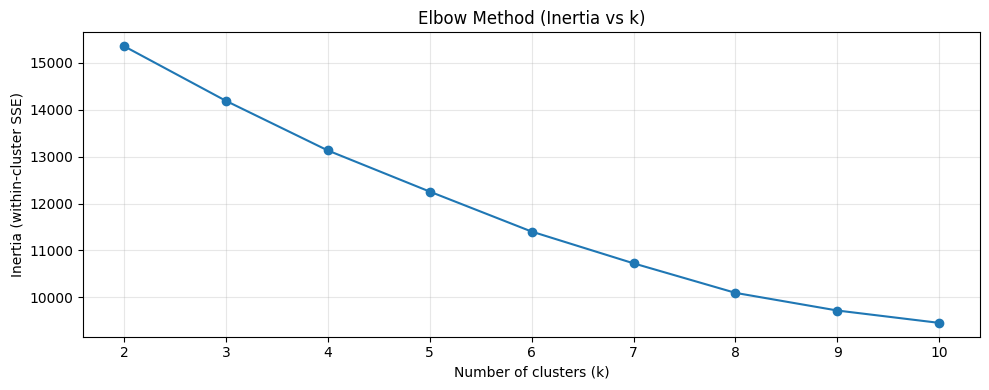

Elbow-selected k = 6
Cluster sizes: {np.int32(0): np.int64(150), np.int32(1): np.int64(161), np.int32(2): np.int64(146), np.int32(3): np.int64(132), np.int32(4): np.int64(284), np.int32(5): np.int64(45)}


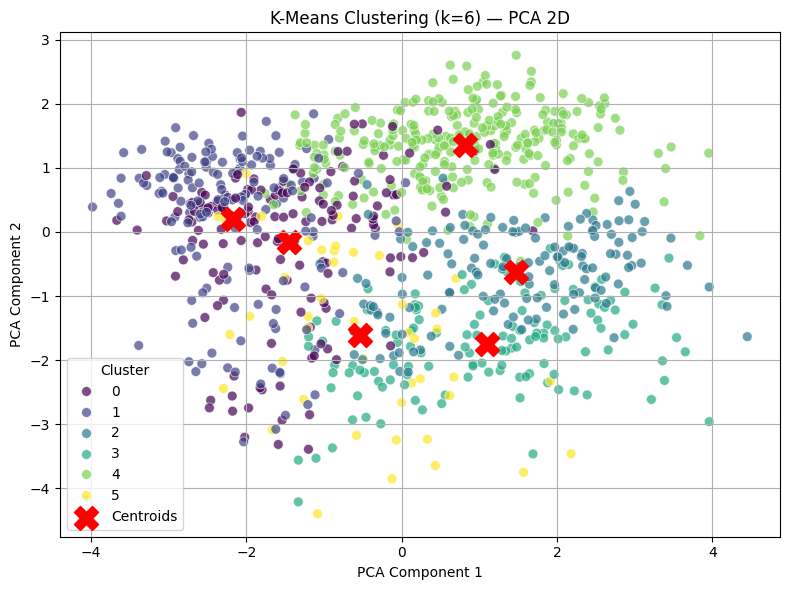

Cluster vs Actual Labels:
 num      0    1   2   3   4
row_0                      
0      108   24   6  12   0
1      146   12   1   2   0
2       33   46  30  30   7
3       38   35  21  25  13
4       60  135  47  35   7
5       26   11   4   3   1


In [224]:
# ------------------- Imports -------------------
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------- Load dataset -------------------
# Assuming 'heart' is your dataset
# heart = pd.read_csv('heart.csv')  # Uncomment if reading from CSV

X = heart.drop('num', axis=1)  # Features only
y_true = heart['num']           # True labels (optional)

# ------------------- Preprocess & Scale -------------------
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(X.median(numeric_only=True))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Clustering feature matrix shape:", X_scaled.shape)

# ------------------- Elbow method to pick k -------------------
K_RANGE = range(2, 11)
inertias = []
for k in K_RANGE:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)


plt.figure(figsize=(10,4))
plt.plot(list(K_RANGE), inertias, marker="o")
plt.title("Elbow Method (Inertia vs k)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster SSE)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("figures/elbow_kmeans.png", dpi=160)
plt.show()

# Max-distance heuristic for automatic elbow detection
k_vals = np.array(list(K_RANGE))
y = np.array(inertias, dtype=float)
x = (k_vals - k_vals.min()) / (k_vals.max() - k_vals.min() + 1e-12)
x0, y0 = x[0], y[0]
x1, y1 = x[-1], y[-1]
num = np.abs((y1 - y0)*x - (x1 - x0)*y + (x1*y0 - y1*x0))
den = np.sqrt((y1 - y0)**2 + (x1 - x0)**2) + 1e-12
dist = num / den
elbow_index = int(np.argmax(dist))
optimal_k = int(k_vals[elbow_index])
print(f"Elbow-selected k = {optimal_k}")

# ------------------- Fit final KMeans -------------------
kmeans = KMeans(n_clusters=optimal_k, n_init=20, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centers = kmeans.cluster_centers_

# Cluster size summary
unique, counts = np.unique(labels, return_counts=True)
sizes = dict(zip(unique, counts))
print("Cluster sizes:", sizes)

# ------------------- Visualize clusters (2D PCA) -------------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
centers_2d = pca.transform(centers)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=labels, palette='viridis', s=50, alpha=0.7
)
plt.scatter(
    centers_2d[:,0], centers_2d[:,1],
    s=300, c='red', marker='X', label='Centroids'
)
plt.title(f"K-Means Clustering (k={optimal_k}) — PCA 2D")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"figures/kmeans_pca_k{optimal_k}.png", dpi=160)
plt.show()

# Optional: compare clusters with true labels
cluster_vs_true = pd.crosstab(labels, y_true)
print("Cluster vs Actual Labels:\n", cluster_vs_true)
